# Question 1

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.layers import Dense, MaxPool1D, Conv1D, BatchNormalization, Dropout, Flatten

In [2]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"salarsafardoost","key":"5010783d99a13d655dc0da5854993779"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip -d /content/dataset

 94% 62.0M/66.0M [00:02<00:00, 41.3MB/s]
100% 66.0M/66.0M [00:02<00:00, 31.3MB/s]
Archive:  creditcardfraud.zip
  inflating: /content/dataset/creditcard.csv  


### Part 3-1

In [4]:
dataset_df = pd.read_csv('/content/dataset/creditcard.csv').set_index('Time')
dataset_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0


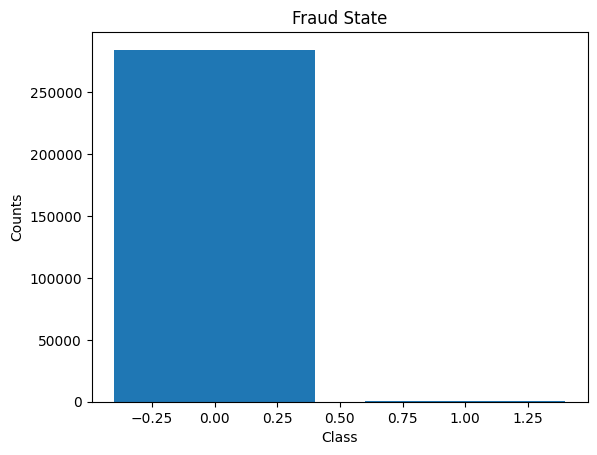

In [5]:
counts = dataset_df['Class'].value_counts()

plt.bar(counts.index, counts.values)
plt.xlabel('Class')
plt.ylabel('Counts')
plt.title('Fraud State')
plt.show()

In [6]:
dataset_df.isnull().any().any()

False

In [7]:
dataset = dataset_df.values

### Part 3-2

In [8]:
x_train_raw, x_test_raw, y_train, y_test = train_test_split(dataset[:, 0:-1], dataset[:, -1], test_size=0.2, random_state=50)
x_train_raw, x_eval_raw, y_train, y_eval = train_test_split(x_train_raw, y_train, test_size=0.25, random_state=50)

In [9]:
scaler = StandardScaler()
scaler.fit(x_train_raw)
x_train = scaler.transform(x_train_raw)
x_eval = scaler.transform(x_eval_raw)
x_test = scaler.transform(x_test_raw)

In [10]:
print(x_train.shape)
print(x_eval.shape)
print(x_test.shape)

(170883, 29)
(56962, 29)
(56962, 29)


In [11]:
ConvNet = Sequential([
    Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(29, 1)),
    BatchNormalization(),
    MaxPool1D(pool_size=2),
    Dropout(rate=0.2),
    Conv1D(filters=64, kernel_size=2, activation='relu'),
    BatchNormalization(),
    MaxPool1D(pool_size=2),
    Dropout(rate=0.5),
    Flatten(),
    Dense(units=64, activation='relu'),
    Dropout(rate=0.2),
    Dense(units=64, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

In [12]:
ConvNet1 = tf.keras.models.clone_model(ConvNet)

ConvNet1.compile(
    loss = BinaryCrossentropy(),
    optimizer = Adam(learning_rate = 0.0001),
    metrics = 'accuracy'
)

ConvNet1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 28, 32)            96        
                                                                 
 batch_normalization (Batch  (None, 28, 32)            128       
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 14, 32)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 13, 64)            4160      
                                                                 
 batch_normalization_1 (Bat  (None, 13, 64)            2

In [13]:
ConvNet1.fit(
    x = x_train,
    y = y_train,
    validation_data = (x_eval, y_eval),
    batch_size = 1024,
    epochs = 46,
    shuffle = True
)

Epoch 1/46
167/167 [==============================] - 10s 12ms/step - loss: 0.1360 - accuracy: 0.9723 - val_loss: 0.6813 - val_accuracy: 0.4578
Epoch 2/46
167/167 [==============================] - 1s 8ms/step - loss: 0.0333 - accuracy: 0.9981 - val_loss: 0.2546 - val_accuracy: 0.9898
Epoch 3/46
167/167 [==============================] - 2s 10ms/step - loss: 0.0196 - accuracy: 0.9982 - val_loss: 0.0617 - val_accuracy: 0.9977
Epoch 4/46
167/167 [==============================] - 2s 11ms/step - loss: 0.0149 - accuracy: 0.9984 - val_loss: 0.0294 - val_accuracy: 0.9985
Epoch 5/46
167/167 [==============================] - 1s 9ms/step - loss: 0.0117 - accuracy: 0.9987 - val_loss: 0.0207 - val_accuracy: 0.9987
Epoch 6/46
167/167 [==============================] - 1s 8ms/step - loss: 0.0106 - accuracy: 0.9987 - val_loss: 0.0172 - val_accuracy: 0.9988
Epoch 7/46
167/167 [==============================] - 1s 8ms/step - loss: 0.0098 - accuracy: 0.9989 - val_loss: 0.0150 - val_accuracy: 0.9989
Ep

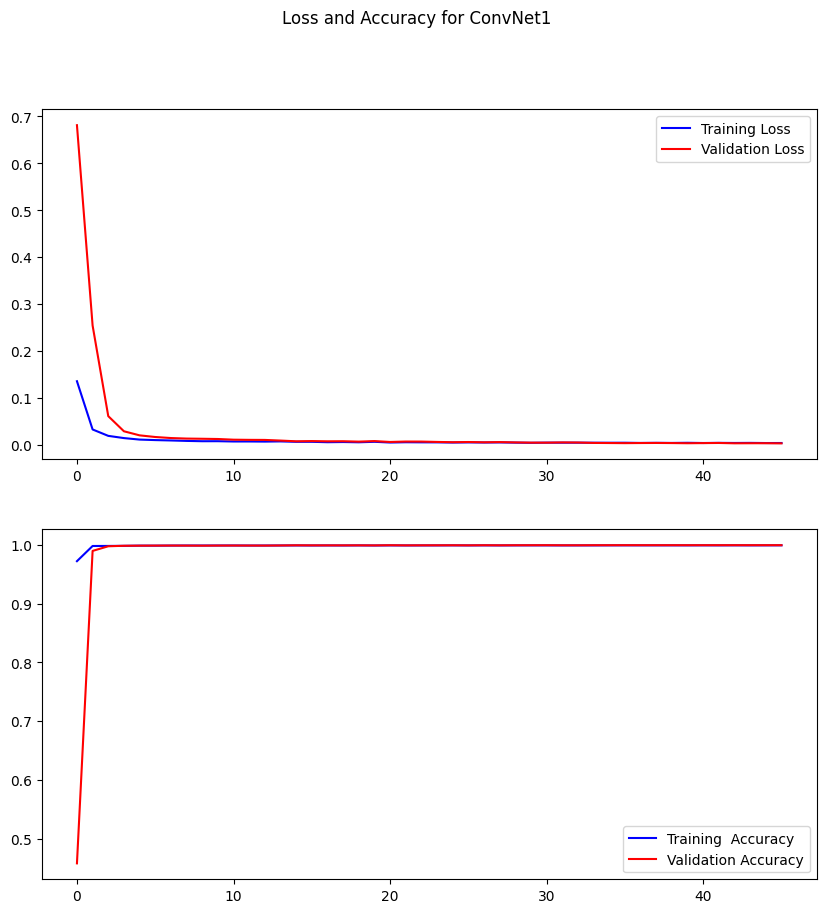

In [14]:
ConvNet1.history.history.keys()
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle('Loss and Accuracy for ConvNet1')

ax[0].plot(ConvNet1.history.history['loss'], color='b', label='Training Loss')
ax[0].plot(ConvNet1.history.history['val_loss'], color='r', label='Validation Loss')
ax[0].legend()

ax[1].plot(ConvNet1.history.history['accuracy'], color='b', label='Training  Accuracy')
ax[1].plot(ConvNet1.history.history['val_accuracy'], color='r', label='Validation Accuracy')
ax[1].legend()

plt.show()

In [15]:
y_eval_pred = ConvNet1.predict(x_eval, batch_size=1024)
y_eval_pred = np.round(y_eval_pred)

56/56 [==============================] - 0s 2ms/step


In [16]:
y_test_pred = ConvNet1.predict(x_test, batch_size=1024)
y_test_pred = np.round(y_test_pred)

56/56 [==============================] - 0s 2ms/step


In [17]:
eval_accuracy = accuracy_score(y_eval, y_eval_pred)
eval_precision = precision_score(y_eval, y_eval_pred)
eval_recall = recall_score(y_eval, y_eval_pred)
eval_f1 = f1_score(y_eval, y_eval_pred)
eval_confusion = confusion_matrix(y_eval, y_eval_pred)

print(f"Evaluation Accuracy:   {round(eval_accuracy, 5)}")
print(f"Evaluation Precision:  {round(eval_precision, 5)}")
print(f"Evaluation Recall:     {round(eval_recall, 5)}")
print(f"Evaluation F1-score:   {round(eval_f1, 5)}")

Evaluation Accuracy:   0.99951
Evaluation Precision:  0.83505
Evaluation Recall:     0.87097
Evaluation F1-score:   0.85263


In [18]:
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_confusion = confusion_matrix(y_test, y_test_pred)

print(f"Test Accuracy:   {round(test_accuracy, 5)}")
print(f"Test Precision:  {round(test_precision, 5)}")
print(f"Test Recall:     {round(test_recall, 5)}")
print(f"Test F1-score:   {round(test_f1, 5)}")

Test Accuracy:   0.99919
Test Precision:  0.7234
Test Recall:     0.77273
Test F1-score:   0.74725


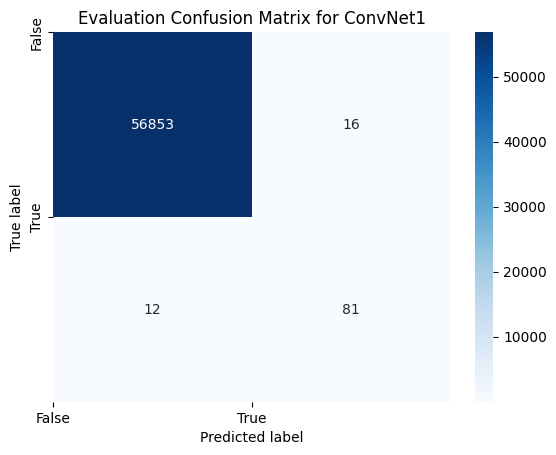

In [19]:
sns.heatmap(eval_confusion, annot=True, cmap='Blues', fmt='d')
plt.title('Evaluation Confusion Matrix for ConvNet1')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks([0, 1], ['False', 'True'])
plt.yticks([0, 1], ['False', 'True'])
plt.show()

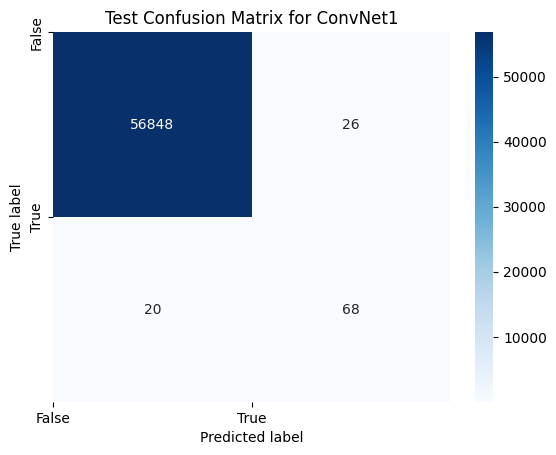

In [20]:
sns.heatmap(test_confusion, annot=True, cmap='Blues', fmt='d')
plt.title('Test Confusion Matrix for ConvNet1')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks([0, 1], ['False', 'True'])
plt.yticks([0, 1], ['False', 'True'])
plt.show()

### Part 3-3

In [21]:
def ADASYN(x, y, beta, k):
  np.random.seed(50)
  minor_num = np.sum(y)
  major_num = len(y) - minor_num

  minors = x[y==1]
  majors = x[y==0]

  synth_num = ((major_num-minor_num)*beta).astype(int)

  kn_minor_args_list = []
  k_nearest_minors_args = []
  weights = []
  for m in minors:
      d = np.sum((m-x)**2, axis=1)
      kn_args = np.argsort(d)[1:k+1]
      kn_minor_args = kn_args[y[kn_args]==1]
      kn_minor_args_list.append(kn_minor_args)
      weight = k-np.sum(y[kn_args])
      weights.append(weight%k)
  weights = np.array(weights)
  minors_synth_num = (synth_num*weights/np.sum(weights)).astype(int)

  synth_x = []
  synth_y = np.ones(np.sum(minors_synth_num))
  for i, m in enumerate(minors):
    synth_num = minors_synth_num[i]
    for j in range(synth_num):
      first_point = m
      second_point = x[np.random.choice(kn_minor_args_list[i])]
      synth_point = first_point+(second_point-first_point)*np.random.rand()
      synth_x.append(synth_point)
  x = np.concatenate((x, np.array(synth_x)), axis=0)
  y = np.concatenate((y, synth_y))
  return x, y

In [22]:
x_balanced, y_balanced = ADASYN(dataset[:, 0:-1], dataset[:, -1], 1, 20)

In [23]:
x_train_raw_balanced, x_test_raw_balanced, y_train_balanced, y_test_balanced = train_test_split(x_balanced, y_balanced, test_size=0.2, random_state=50)
x_train_raw_balanced, x_eval_raw_balanced, y_train_balanced, y_eval_balanced = train_test_split(x_train_raw_balanced, y_train_balanced, test_size=0.25, random_state=50)

In [24]:
scaler = StandardScaler()
scaler.fit(x_train_raw_balanced)
x_train_balanced = scaler.transform(x_train_raw_balanced)
x_eval_balanced = scaler.transform(x_eval_raw_balanced)
x_test_balanced = scaler.transform(x_test_raw_balanced)

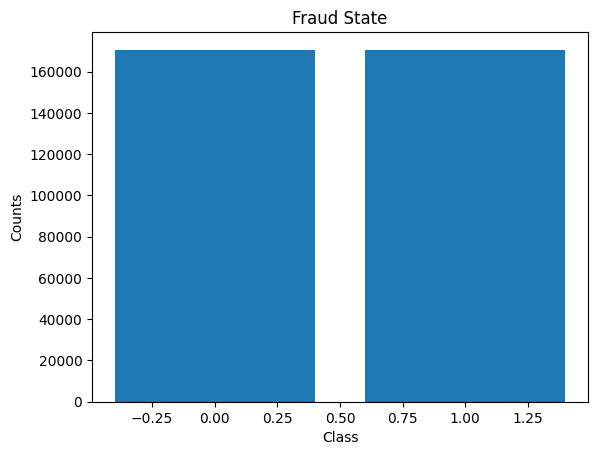

In [25]:
plt.bar([0, 1], [len(y_train_balanced)-np.sum(y_train_balanced), np.sum(y_train_balanced)])
plt.xlabel('Class')
plt.ylabel('Counts')
plt.title('Fraud State')
plt.show()

In [26]:
ConvNet2 = tf.keras.models.clone_model(ConvNet)

ConvNet2.compile(
    loss = BinaryCrossentropy(),
    optimizer = Adam(learning_rate = 0.0001),
    metrics = 'accuracy'
)

ConvNet2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 28, 32)            96        
                                                                 
 batch_normalization (Batch  (None, 28, 32)            128       
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 14, 32)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 13, 64)            4160      
                                                                 
 batch_normalization_1 (Bat  (None, 13, 64)            2

In [27]:
ConvNet2.fit(
    x = x_train_balanced,
    y = y_train_balanced,
    validation_data = (x_eval_balanced, y_eval_balanced),
    batch_size = 1024,
    epochs = 46,
    shuffle = True
)

Epoch 1/46
334/334 [==============================] - 6s 11ms/step - loss: 0.3349 - accuracy: 0.8652 - val_loss: 0.1429 - val_accuracy: 0.9806
Epoch 2/46
334/334 [==============================] - 3s 8ms/step - loss: 0.0706 - accuracy: 0.9799 - val_loss: 0.0294 - val_accuracy: 0.9931
Epoch 3/46
334/334 [==============================] - 3s 8ms/step - loss: 0.0451 - accuracy: 0.9870 - val_loss: 0.0181 - val_accuracy: 0.9937
Epoch 4/46
334/334 [==============================] - 3s 8ms/step - loss: 0.0337 - accuracy: 0.9896 - val_loss: 0.0128 - val_accuracy: 0.9971
Epoch 5/46
334/334 [==============================] - 3s 9ms/step - loss: 0.0266 - accuracy: 0.9919 - val_loss: 0.0108 - val_accuracy: 0.9977
Epoch 6/46
334/334 [==============================] - 3s 8ms/step - loss: 0.0222 - accuracy: 0.9936 - val_loss: 0.0097 - val_accuracy: 0.9979
Epoch 7/46
334/334 [==============================] - 3s 8ms/step - loss: 0.0195 - accuracy: 0.9946 - val_loss: 0.0084 - val_accuracy: 0.9982
Epoch

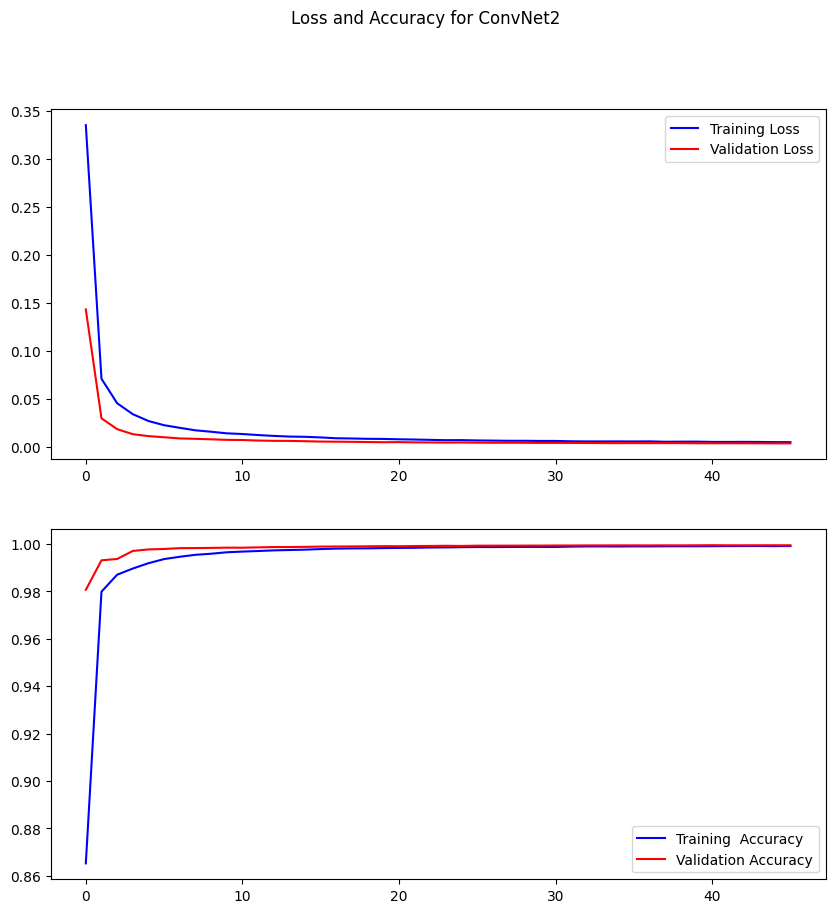

In [28]:
ConvNet2.history.history.keys()
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle('Loss and Accuracy for ConvNet2')

ax[0].plot(ConvNet2.history.history['loss'], color='b', label='Training Loss')
ax[0].plot(ConvNet2.history.history['val_loss'], color='r', label='Validation Loss')
ax[0].legend()

ax[1].plot(ConvNet2.history.history['accuracy'], color='b', label='Training  Accuracy')
ax[1].plot(ConvNet2.history.history['val_accuracy'], color='r', label='Validation Accuracy')
ax[1].legend()

plt.show()

In [29]:
y_eval_pred_balanced = ConvNet2.predict(x_eval_balanced, batch_size=1024)
y_eval_pred_balanced = np.round(y_eval_balanced)

112/112 [==============================] - 0s 2ms/step


In [30]:
y_test_pred_balanced = ConvNet2.predict(x_test_balanced, batch_size=1024)
y_test_pred_balanced = np.round(y_test_pred_balanced)

112/112 [==============================] - 0s 2ms/step


In [31]:
eval_accuracy = accuracy_score(y_eval_balanced, y_eval_pred_balanced)
eval_precision = precision_score(y_eval_balanced, y_eval_pred_balanced)
eval_recall = recall_score(y_eval_balanced, y_eval_pred_balanced)
eval_f1 = f1_score(y_eval_balanced, y_eval_pred_balanced)
eval_confusion = confusion_matrix(y_eval_balanced, y_eval_pred_balanced)

print(f"Evaluation Accuracy:   {round(eval_accuracy, 5)}")
print(f"Evaluation Precision:  {round(eval_precision, 5)}")
print(f"Evaluation Recall:     {round(eval_recall, 5)}")
print(f"Evaluation F1-score:   {round(eval_f1, 5)}")

Evaluation Accuracy:   1.0
Evaluation Precision:  1.0
Evaluation Recall:     1.0
Evaluation F1-score:   1.0


In [32]:
test_accuracy = accuracy_score(y_test_balanced, y_test_pred_balanced)
test_precision = precision_score(y_test_balanced, y_test_pred_balanced)
test_recall = recall_score(y_test_balanced, y_test_pred_balanced)
test_f1 = f1_score(y_test_balanced, y_test_pred_balanced)
test_confusion = confusion_matrix(y_test_balanced, y_test_pred_balanced)

print(f"Test Accuracy:   {round(test_accuracy, 5)}")
print(f"Test Precision:  {round(test_precision, 5)}")
print(f"Test Recall:     {round(test_recall, 5)}")
print(f"Test F1-score:   {round(test_f1, 5)}")

Test Accuracy:   0.9993
Test Precision:  0.99884
Test Recall:     0.99975
Test F1-score:   0.9993


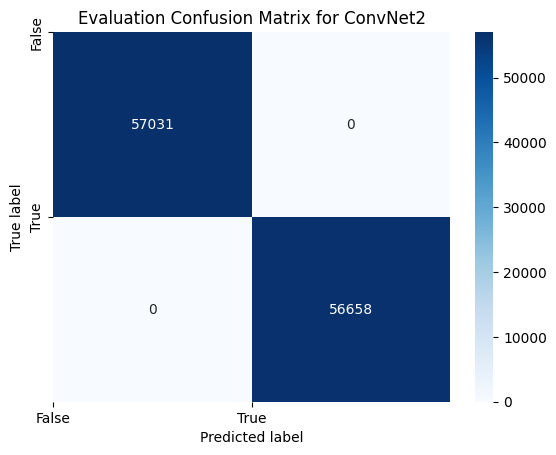

In [33]:
sns.heatmap(eval_confusion, annot=True, cmap='Blues', fmt='d')
plt.title('Evaluation Confusion Matrix for ConvNet2')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks([0, 1], ['False', 'True'])
plt.yticks([0, 1], ['False', 'True'])
plt.show()

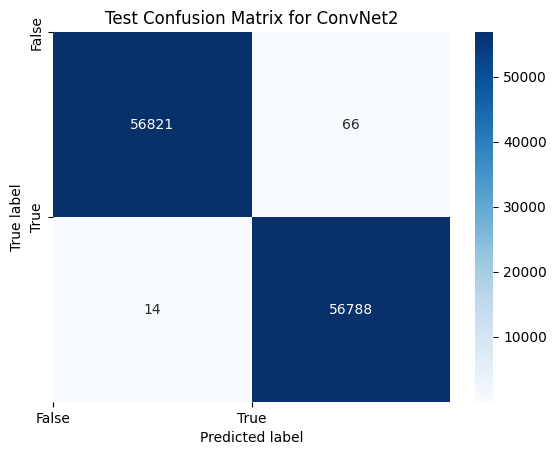

In [34]:
sns.heatmap(test_confusion, annot=True, cmap='Blues', fmt='d')
plt.title('Test Confusion Matrix for ConvNet2')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks([0, 1], ['False', 'True'])
plt.yticks([0, 1], ['False', 'True'])
plt.show()

### Part Extra 1

In [35]:
x_train_balanced, y_train_balanced = ADASYN(x_train, y_train, 1, 20)

In [36]:
ConvNet3 = tf.keras.models.clone_model(ConvNet)

ConvNet3.compile(
    loss = BinaryCrossentropy(),
    optimizer = Adam(learning_rate = 0.0001),
    metrics = 'accuracy'
)

ConvNet3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 28, 32)            96        
                                                                 
 batch_normalization (Batch  (None, 28, 32)            128       
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 14, 32)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 13, 64)            4160      
                                                                 
 batch_normalization_1 (Bat  (None, 13, 64)            2

In [37]:
ConvNet3.fit(
    x = x_train_balanced,
    y = y_train_balanced,
    validation_data = (x_eval, y_eval),
    batch_size = 1024,
    epochs = 46,
    shuffle = True
)

Epoch 1/46
334/334 [==============================] - 5s 8ms/step - loss: 0.1946 - accuracy: 0.9222 - val_loss: 0.0525 - val_accuracy: 0.9850
Epoch 2/46
334/334 [==============================] - 2s 7ms/step - loss: 0.0488 - accuracy: 0.9846 - val_loss: 0.0374 - val_accuracy: 0.9887
Epoch 3/46
334/334 [==============================] - 3s 8ms/step - loss: 0.0316 - accuracy: 0.9907 - val_loss: 0.0298 - val_accuracy: 0.9912
Epoch 4/46
334/334 [==============================] - 3s 9ms/step - loss: 0.0248 - accuracy: 0.9930 - val_loss: 0.0258 - val_accuracy: 0.9925
Epoch 5/46
334/334 [==============================] - 2s 7ms/step - loss: 0.0204 - accuracy: 0.9944 - val_loss: 0.0227 - val_accuracy: 0.9938
Epoch 6/46
334/334 [==============================] - 2s 7ms/step - loss: 0.0180 - accuracy: 0.9955 - val_loss: 0.0207 - val_accuracy: 0.9944
Epoch 7/46
334/334 [==============================] - 2s 7ms/step - loss: 0.0157 - accuracy: 0.9962 - val_loss: 0.0185 - val_accuracy: 0.9948
Epoch 

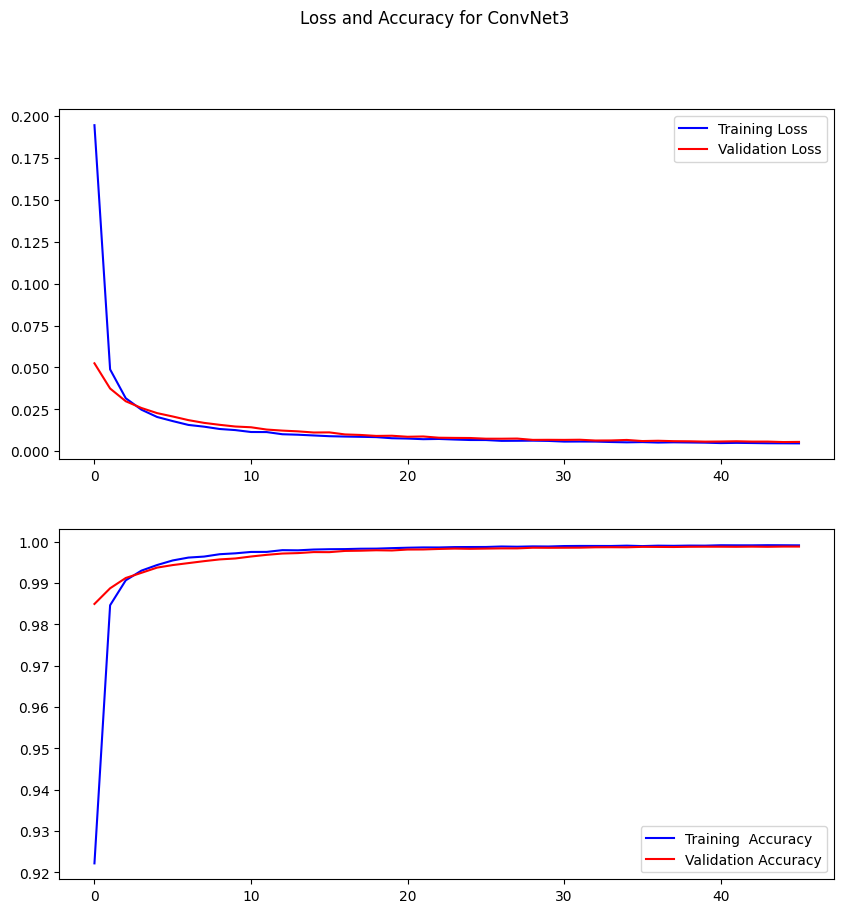

In [38]:
ConvNet3.history.history.keys()
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle('Loss and Accuracy for ConvNet3')

ax[0].plot(ConvNet3.history.history['loss'], color='b', label='Training Loss')
ax[0].plot(ConvNet3.history.history['val_loss'], color='r', label='Validation Loss')
ax[0].legend()

ax[1].plot(ConvNet3.history.history['accuracy'], color='b', label='Training  Accuracy')
ax[1].plot(ConvNet3.history.history['val_accuracy'], color='r', label='Validation Accuracy')
ax[1].legend()

plt.show()

In [39]:
y_eval_pred = ConvNet3.predict(x_eval, batch_size=1024)
y_eval_pred = np.round(y_eval_pred)

56/56 [==============================] - 0s 2ms/step


In [40]:
y_test_pred = ConvNet3.predict(x_test, batch_size=1024)
y_test_pred = np.round(y_test_pred)

56/56 [==============================] - 0s 2ms/step


In [41]:
eval_accuracy = accuracy_score(y_eval, y_eval_pred)
eval_precision = precision_score(y_eval, y_eval_pred)
eval_recall = recall_score(y_eval, y_eval_pred)
eval_f1 = f1_score(y_eval, y_eval_pred)
eval_confusion = confusion_matrix(y_eval, y_eval_pred)

print(f"Evaluation Accuracy:   {round(eval_accuracy, 5)}")
print(f"Evaluation Precision:  {round(eval_precision, 5)}")
print(f"Evaluation Recall:     {round(eval_recall, 5)}")
print(f"Evaluation F1-score:   {round(eval_f1, 5)}")

Evaluation Accuracy:   0.99884
Evaluation Precision:  0.59574
Evaluation Recall:     0.90323
Evaluation F1-score:   0.71795


In [48]:
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_confusion = confusion_matrix(y_test, y_test_pred)

print(f"Evaluation Accuracy:   {round(eval_accuracy, 5)}")
print(f"Evaluation Precision:  {round(eval_precision, 5)}")
print(f"Evaluation Recall:     {round(eval_recall, 5)}")
print(f"Evaluation F1-score:   {round(eval_f1, 5)}")

Evaluation Accuracy:   0.99884
Evaluation Precision:  0.59574
Evaluation Recall:     0.90323
Evaluation F1-score:   0.71795


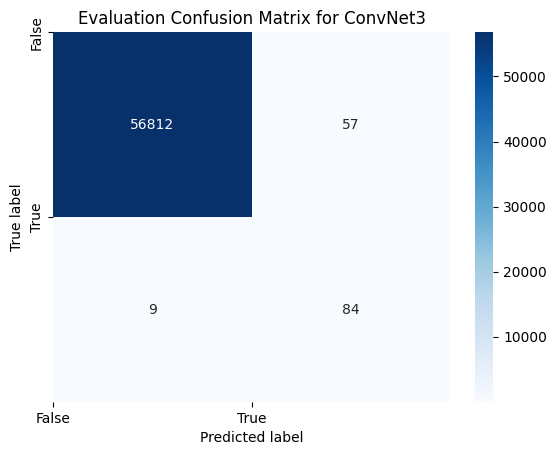

In [42]:
sns.heatmap(eval_confusion, annot=True, cmap='Blues', fmt='d')
plt.title('Evaluation Confusion Matrix for ConvNet3')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks([0, 1], ['False', 'True'])
plt.yticks([0, 1], ['False', 'True'])
plt.show()

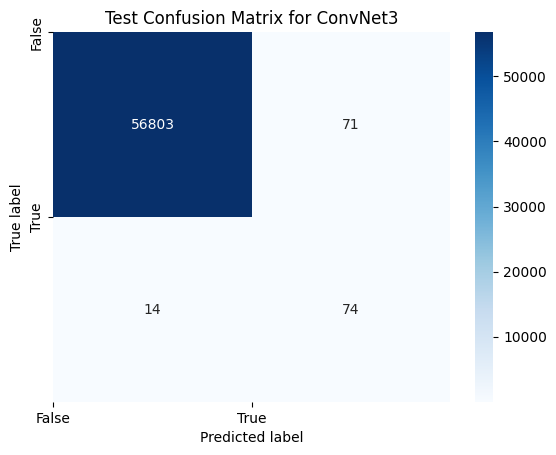

In [49]:
sns.heatmap(test_confusion, annot=True, cmap='Blues', fmt='d')
plt.title('Test Confusion Matrix for ConvNet3')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks([0, 1], ['False', 'True'])
plt.yticks([0, 1], ['False', 'True'])
plt.show()

### Part Extra 2

In [44]:
def generate_samples(class0_samples, class1_samples):
    total_samples = class0_samples + class1_samples

    class0_x = np.random.normal(loc=0, scale=1, size=(class0_samples, 2))
    class0_y = np.zeros(class0_samples, dtype=int)

    class1_x = np.random.normal(loc=2, scale=1, size=(class1_samples, 2))
    class1_y = np.ones(class1_samples, dtype=int)

    x = np.concatenate((class0_x, class1_x), axis=0)
    y = np.concatenate((class0_y, class1_y), axis=0)

    shuffled_indices = np.random.permutation(total_samples)
    x = x[shuffled_indices]
    y = y[shuffled_indices]

    return x, y

In [45]:
x, y = generate_samples(25, 5)

In [46]:
xs, ys = ADASYN(x, y, 1, 8)

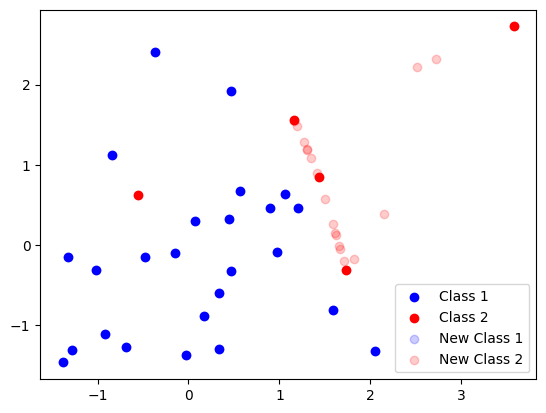

In [47]:
x1 = x[y==0]
x2 = x[y==1]
xs1 = xs[ys==0]
xs2 = xs[ys==1]

plt.scatter(x1[:, 0], x1[:, 1], label='Class 1', color='blue')
plt.scatter(x2[:, 0], x2[:, 1], label='Class 2', color='red')
plt.scatter(xs1[:, 0], xs1[:, 1], label='New Class 1', alpha=0.2, color='blue')
plt.scatter(xs2[:, 0], xs2[:, 1], label='New Class 2', alpha=0.2, color='red')
plt.legend()
plt.show()